<p><font size="6"><b> CASE - Bike count data</b></font></p>


> *DS Data manipulation, analysis and visualisation in Python*  
> *December, 2017*

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

<img src="https://nbocdn.akamaized.net/Assets/Images_Upload/2016/11/24/GEFV45415.jpg?maxheight=460&maxwidth=638">

In this case study, we will make use of the freely available bike count data of the city of Ghent. At the Coupure Links, next to the Faculty of Bioscience Engineering, a counter keeps track of the number of passing cyclists in both directions.  
Those data are available on the open data portal of the city: https://data.stad.gent/datasets/fietstellingen-coupure-201312-tot-201505

In [ ]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

## Reading and processing the data

### Read csv data from URL

The data are avaible in CSV, JSON and XML format. We will make use of the CSV data. The link to download the data can be found on the webpage. For the first dataset, this is:

    link = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201210tot201403.csv"
    
A limit defines the size of the requested data set, by adding a limit parameter `limit` to the URL :

    link = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201210tot201403.csv?limit=100000"

Those datasets contain the historical data of the bike counters, and consist of the following columns:

- The first column `dag` is the date, in `dd.mm.yy` format
- The second column `tijdstip` is the time of the day, in `hh:mm:ss` format
- The third and fourth column `noord` and `zuid` are the counts at that point in time (counts between this timestamp and the previous)
- The fifth column, `actief`, indicates whether the device was active or not

In [12]:
limit = 100000
link = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201210tot201403.csv?limit={}".format(limit)

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Read the csv file from the url into a DataFrame `df`, the delimiter of the data is `;`</li>
  <li>Inspect the first and last 5 rows, and check the number of observations</li>
  <li>Inspect the data types of the different columns</li>

</ul> 

</div>

In [13]:
data = pd.read_csv(link, sep = ";")

In [14]:
data.head(5)

,dag,tijdstip,noord,zuid,actief
0,12.10.12,23:12:21,7,10,NaN
1,12.10.12,23:27:21,16,18,NaN
2,12.10.12,23:42:21,7,17,NaN
3,12.10.12,23:57:21,1,12,NaN
4,13.10.12,0:12:21,6,5,NaN


In [15]:
data.tail(5)

,dag,tijdstip,noord,zuid,actief
49995,17.03.14,16:05:09,47,62,NaN
49996,17.03.14,16:20:09,43,67,NaN
49997,17.03.14,16:35:09,41,100,NaN
49998,17.03.14,16:50:09,50,112,NaN
49999,17.03.14,17:05:09,64,98,NaN


In [16]:
data.apply(type)

dag         <class 'pandas.core.series.Series'>
tijdstip    <class 'pandas.core.series.Series'>
noord       <class 'pandas.core.series.Series'>
zuid        <class 'pandas.core.series.Series'>
actief      <class 'pandas.core.series.Series'>
dtype: object

In [ ]:
# %load _solutions/case1_bike_count3.py

In [8]:
# %load _solutions/case1_bike_count4.py

In [9]:
# %load _solutions/case1_bike_count5.py

In [10]:
# %load _solutions/case1_bike_count6.py

In [11]:
# %load _solutions/case1_bike_count7.py

### Data processing

As explained above, the first and second column (respectively `dag` and `tijdstip`) indicate the date and hour of the day. To obtain a time series, we have to combine those two columns into one series of actual datetime values. 

<div class="alert alert-success">

 <b>EXERCISE</b>: Process the data

 <ul>
  <li>Combine the 'dag' and 'tijdstip' columns into one Series of string datetime values </li>
  <li>Parse the string datetime values</li>
  <li>Set the resulting dates as the index</li>
  <li>Remove the original 'dag' and 'tijdstip' columns</li>
  <li>Rename the 'noord', 'zuid' and 'actief' columns to 'north', 'south' and 'active'</li>
</ul> 

</div>

In [17]:
combined = data['dag'] + " " + data['tijdstip']
data['date'] = pd.to_datetime(combined, dayfirst = True)
#pd.to_datetime

In [18]:
data.head(5)

,dag,tijdstip,noord,zuid,actief,date
0,12.10.12,23:12:21,7,10,NaN,2012-10-12 23:12:21
1,12.10.12,23:27:21,16,18,NaN,2012-10-12 23:27:21
2,12.10.12,23:42:21,7,17,NaN,2012-10-12 23:42:21
3,12.10.12,23:57:21,1,12,NaN,2012-10-12 23:57:21
4,13.10.12,0:12:21,6,5,NaN,2012-10-13 00:12:21


In [19]:
data = data.set_index("date")
data.head(5)

,dag,tijdstip,noord,zuid,actief
date,,,,,
2012-10-12 23:12:21,12.10.12,23:12:21,7,10,NaN
2012-10-12 23:27:21,12.10.12,23:27:21,16,18,NaN
2012-10-12 23:42:21,12.10.12,23:42:21,7,17,NaN
2012-10-12 23:57:21,12.10.12,23:57:21,1,12,NaN
2012-10-13 00:12:21,13.10.12,0:12:21,6,5,NaN


In [20]:
data = data.loc[:, ['noord','zuid','actief']]
# data = data.drop(['dag', 'tijdstip'], axis=1) # alternative

In [21]:
data = data.rename(columns = {'noord':"north", 'zuid':'south', 'actief':'active'})

In [22]:
# %load _solutions/case1_bike_count8.py

In [23]:
# %load _solutions/case1_bike_count9.py

In [24]:
# %load _solutions/case1_bike_count10.py

In [25]:
# %load _solutions/case1_bike_count11.py

In [26]:
data.head()

,north,south,active
date,,,
2012-10-12 23:12:21,7,10,NaN
2012-10-12 23:27:21,16,18,NaN
2012-10-12 23:42:21,7,17,NaN
2012-10-12 23:57:21,1,12,NaN
2012-10-13 00:12:21,6,5,NaN


<IPython.core.display.Javascript object>


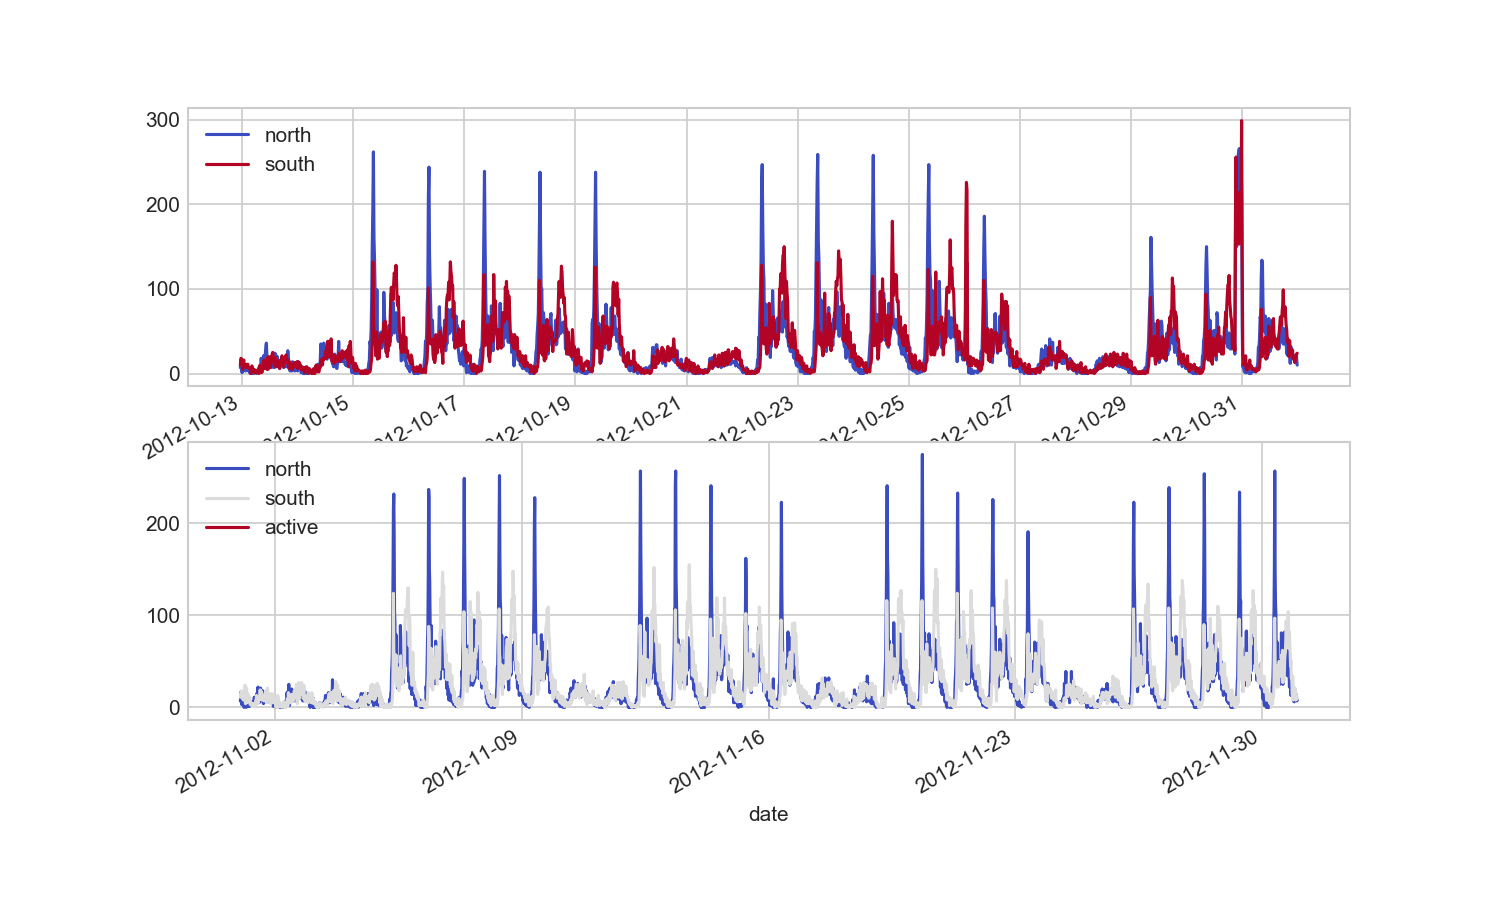

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
data["2012-10"].plot(colormap='coolwarm', ax=ax1)
data["2012-11"].plot(colormap='coolwarm', ax=ax2)

Having the data available with an interpreted datetime, provides us the possibility of having time aware plotting:

<div class="alert alert-warning">

 <b>Remark</b>: Interpretation of the dates with and without predefined dateformat

</div>

When we just want to interpret the dates, without specifying how the dates are formatted, Pandas makes an attempt as good as possible:

In [28]:
%timeit pd.to_datetime(combined, dayfirst=True)

11.5 s ± 352 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


However, when we already know the format of the dates, we can use this information to interpret the dates:

In [29]:
%timeit pd.to_datetime(combined, format="%d.%m.%y %H:%M:%S")

188 ms ± 3.47 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<div class="alert alert-info">

 <b>Remember</b>: Whenever possible, specify the dateformat to interpret the dates to datetime values!

</div>

### Combining the download  and processing of different data sets

The bike count data are available in multiple datasets for several periods. 

In [30]:
link1 = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201210tot201403.csv?limit=100000"
link2 = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201312tot201505.csv?limit=100000"

To obtain the full time series, we will have to combine those datasets.

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Write a function `process_bike_count_data(df)` that performs the processing steps as done above for an input DataFrame and return the updated DataFrame</li>
</ul> 

</div>

In [31]:
def process_bike_count_data(df):
    """Preprocess bike dataset"""
    tmp = df['dag'] + " " + df['tijdstip']
    df['date'] = pd.to_datetime(tmp, dayfirst = True)
    df = df.set_index("date")
    df_process = df.drop(['dag', 'tijdstip'], axis=1)
    df_process = df_process.rename(columns = {'noord':"north", 'zuid':'south', 'actief':'active'})
    #fig, ax = plt.subplots(figsize=(10, 6))
    #df_process.plot(colormap='coolwarm', ax=ax)
    return df_process

In [32]:
# %load _solutions/case1_bike_count17.py

In [33]:
df1 = pd.read_csv(link1, sep=';')
df1 = process_bike_count_data(df1)
df1.head(5)

,north,south,active
date,,,
2012-10-12 23:12:21,7,10,NaN
2012-10-12 23:27:21,16,18,NaN
2012-10-12 23:42:21,7,17,NaN
2012-10-12 23:57:21,1,12,NaN
2012-10-13 00:12:21,6,5,NaN


In [34]:
df2 = pd.read_csv(link2, sep=';')
df2 = process_bike_count_data(df2)
df2.head(5)

,north,south,active
date,,,
2013-12-22 15:17:08,10,10,NaN
2013-12-22 15:32:08,7,15,NaN
2013-12-22 15:47:08,14,15,NaN
2013-12-22 16:02:08,8,12,NaN
2013-12-22 16:17:08,17,6,NaN


<IPython.core.display.Javascript object>


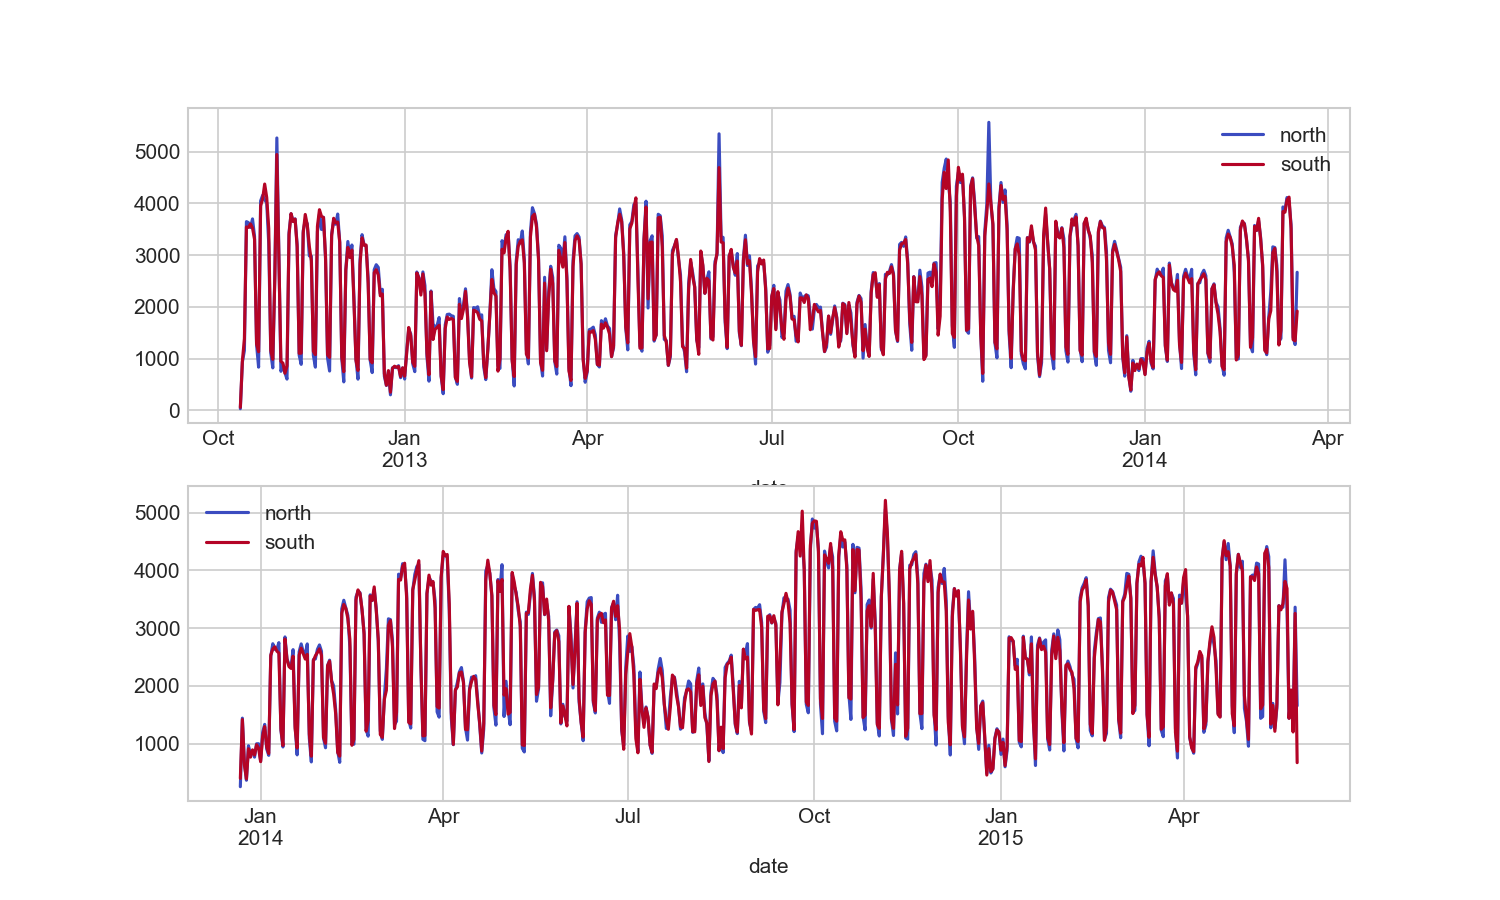

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
df1.resample('D').sum().plot(colormap='coolwarm', ax = ax1)
df2.resample('D').sum().plot(colormap='coolwarm', ax = ax2)

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Concatenate both datasets `df1` and `df2`. <br>**Attention!**: there is some overlap, so use a subset of `df2`, starting at "2014-03-17 17:05:10"</li>
</ul>
</div>

In [39]:
df2 = df2.loc['2014-03-17 17:05:10':, ] # why does this resulting dataframe object does not work with pd.concat?
df2.head()

,north,south,active
date,,,
2014-03-17 17:20:09,80,102,NaN
2014-03-17 17:35:09,45,115,NaN
2014-03-17 17:50:09,60,141,NaN
2014-03-17 18:05:09,74,124,NaN
2014-03-17 18:20:09,76,146,NaN


In [40]:
df_merge = pd.concat([df1, df2])

In [41]:
df_merge.head()
# %load _solutions/case1_bike_count20.py

,north,south,active
date,,,
2012-10-12 23:12:21,7,10,NaN
2012-10-12 23:27:21,16,18,NaN
2012-10-12 23:42:21,7,17,NaN
2012-10-12 23:57:21,1,12,NaN
2012-10-13 00:12:21,6,5,NaN


In [42]:
# %load _solutions/case1_bike_count21.py

In [43]:
# %load _solutions/case1_bike_count22.py
df = pd.concat([df1, df2["2014-03-17 17:05:10":]])

In [44]:
df.sum(axis=1).resample('D').sum().nlargest()

date
2014-11-05    10269
2012-10-30    10213
2013-06-05    10041
2013-10-16     9948
2014-09-30     9702
dtype: int64

In [45]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91831 entries, 2012-10-12 23:12:21 to 2015-05-27 11:25:02
Data columns (total 3 columns):
north     91831 non-null int64
south     91831 non-null int64
active    26 non-null object
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


,north,south,active
date,,,
2012-10-12 23:12:21,7,10,NaN
2012-10-12 23:27:21,16,18,NaN
2012-10-12 23:42:21,7,17,NaN
2012-10-12 23:57:21,1,12,NaN
2012-10-13 00:12:21,6,5,NaN


### Alternative handling of overlap in individual data sets

Instead of selecting a subset of `df2`, we also could execute a more *lazy* approach:
* concatenate the two dataframes
* remove the duplicate rows of the resulting dataframe (**Attention!**, the index is not taken into account when removing duplicates)

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Concatenate both datasets `df1` and `df2` as such and remove the duplicate values. Store the result in a DataFrame `df3`</li>
</ul>
</div>

In [46]:
df3 = pd.concat([df1,df2])
df3.head()

,north,south,active
date,,,
2012-10-12 23:12:21,7,10,NaN
2012-10-12 23:27:21,16,18,NaN
2012-10-12 23:42:21,7,17,NaN
2012-10-12 23:57:21,1,12,NaN
2012-10-13 00:12:21,6,5,NaN


In [47]:
df3 = df3[df3.index.duplicated() == False]
# df3 = df3[~df3.index.duplicated()] # alternative

In [48]:
# %load _solutions/case1_bike_count24.py
#df3 = pd.concat([df1, df2])

In [49]:
# %load _solutions/case1_bike_count25.py
#Ydf3 = df3[~df3.index.duplicated()]

Checking if we get the same result, by evaluating the info and testing if `df` and `df3` are the same:

In [50]:
df3.info()
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91830 entries, 2012-10-12 23:12:21 to 2015-05-27 11:25:02
Data columns (total 3 columns):
north     91830 non-null int64
south     91830 non-null int64
active    25 non-null object
dtypes: int64(2), object(1)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91831 entries, 2012-10-12 23:12:21 to 2015-05-27 11:25:02
Data columns (total 3 columns):
north     91831 non-null int64
south     91831 non-null int64
active    26 non-null object
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


Check if the resulting DataFrame corresponds to our manually removed overlap:

In [51]:
df3.equals(df_merge)

False

Remark the difference... This has actullay nothing to do with the way data is combined, but due to 2 records on the same moment with a difference in the `active` column (check `2013-11-21 03:40:23` in `df` and `df3`).

### Store our collected dataset as an interim data product

As we finished our data-collection step, we want to save this result as a interim data output of our small investigation. As such, we do not have to re-download all the files each time something went wrong, but can restart from our interim step.

In [52]:
df3.to_csv("bike_count_interim.csv")

## Data exploration and analysis

We now have the combined and cleaned-up dataset of the bike counts at Coupure Links. But there are two more things we want to check and we want to get an impression of the characteristics and properties of the data

### Load the interim data

Reading the file in from the interim file (when you want to rerun the whole analysis on the updated online data, you would comment out this cell...)

In [53]:
df = pd.read_csv("./bike_count_interim.csv", index_col=0, parse_dates=True)
df.head()

,north,south,active
date,,,
2012-10-12 23:12:21,7,10,NaN
2012-10-12 23:27:21,16,18,NaN
2012-10-12 23:42:21,7,17,NaN
2012-10-12 23:57:21,1,12,NaN
2012-10-13 00:12:21,6,5,NaN


### Activity of the bike counts

There is a column 'active' which should indicates if the count device was working. Let's have a look a this column.

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What are the different unique values of the 'active' column and how many times does each of these values occur?</li>
</ul> 

</div>

In [54]:
uniq_ac = list(df['active'].unique())
uniq_ac
sum(df['active'].isna())

91805

In [55]:
sum(df['active'] == uniq_ac[1])

25

In [56]:
# %load _solutions/case1_bike_count30.py
df['active'].value_counts(dropna=False)

NaN    91805
OFF       25
Name: active, dtype: int64

We are only interested in the periods of data when the device was working:

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Remove all rows where the device was not working</li>
</ul> 

</div>

In [57]:
df = df[~(df['active'] == uniq_ac[1])]
df.head()

,north,south,active
date,,,
2012-10-12 23:12:21,7,10,NaN
2012-10-12 23:27:21,16,18,NaN
2012-10-12 23:42:21,7,17,NaN
2012-10-12 23:57:21,1,12,NaN
2012-10-13 00:12:21,6,5,NaN


In [58]:
# %load _solutions/case1_bike_count31.py

### Count interval verification

The number of bikers are counted for intervals of approximately 15 minutes. But let's check if this is indeed the case.  
For this, we want to calculate the difference between each of the consecutive values of the index. We can use the `Series.diff()` method:

In [59]:
pd.Series(df.index).diff()

0            NaT
1       00:15:00
2       00:15:00
3       00:15:00
4       00:15:00
5       00:15:00
6       00:15:00
7       00:15:00
8       00:15:00
9       00:15:00
10      00:15:00
11      00:15:00
12      00:15:00
13      00:15:00
14      00:15:00
15      00:15:00
16      00:15:00
17      00:15:00
18      00:15:00
19      00:15:00
20      00:15:00
21      00:15:00
22      00:15:00
23      00:15:00
24      00:15:00
25      00:15:00
26      00:15:00
27      00:15:00
28      00:15:00
29      00:15:00
          ...   
91775   00:15:00
91776   00:15:00
91777   00:15:00
91778   00:15:00
91779   00:15:00
91780   00:15:00
91781   00:15:00
91782   00:15:00
91783   00:15:00
91784   00:15:00
91785   00:15:00
91786   00:15:00
91787   00:15:00
91788   00:15:00
91789   00:15:00
91790   00:15:00
91791   00:15:00
91792   00:15:00
91793   00:15:00
91794   00:15:00
91795   00:15:00
91796   00:15:00
91797   00:15:00
91798   00:15:00
91799   00:15:00
91800   00:15:00
91801   00:15:00
91802   00:15:

Again, the count of the possible intervals is of interest:

In [60]:
pd.Series(df.index).diff().value_counts()

00:15:00             91772
-1 days +23:15:01        3
01:15:01                 3
00:28:03                 1
00:27:57                 1
00:21:33                 1
00:18:18                 1
00:46:54                 1
00:23:40                 1
00:26:02                 1
00:44:40                 1
00:27:59                 1
00:18:01                 1
00:23:18                 1
00:24:57                 1
00:37:35                 1
00:25:25                 1
00:21:25                 1
00:20:26                 1
00:41:03                 1
00:19:05                 1
00:27:37                 1
00:24:32                 1
00:22:33                 1
00:43:15                 1
00:26:01                 1
00:27:35                 1
00:15:20                 1
00:19:21                 1
Name: date, dtype: int64

There are a few records that is not exactly 15min. But given it are only a few ones, we will ignore this for the current case study and just keep them as such for this explorative study.  
Bonus question: do you know where the values of `-1 days +23:15:01` and `01:15:01` are coming from?

In [61]:
df.describe()

,north,south
count,91805.000000,91805.000000
mean,25.240935,25.101628
std,31.458288,26.690699
min,0.000000,0.000000
25%,5.000000,6.000000
50%,17.000000,17.000000
75%,33.000000,33.000000
max,361.000000,299.000000


### Count statistics

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the average number of bikers passing each 15 min?</li>
</ul> 

</div>

In [62]:
df.mean()

north     25.240935
south     25.101628
active          NaN
dtype: float64

In [63]:
# %load _solutions/case1_bike_count35.py
df.mean()

north     25.240935
south     25.101628
active          NaN
dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the average number of bikers passing each hour?</li>
</ul> 

</div>

In [64]:
df.resample('H').sum().mean()

north    100.951642
south    100.394485
dtype: float64

In [65]:
# %load _solutions/case1_bike_count36.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What are the 10 highest peak values observed during any of the intervals?</li>
</ul> 

</div>

In [66]:
df.resample('H').sum().sort_values(by=['north','south'], ascending = False).head(10)

,north,south
date,,
2013-10-16 21:00:00,1002.0,160.0
2012-10-30 22:00:00,999.0,718.0
2013-09-24 08:00:00,923.0,282.0
2013-10-01 08:00:00,920.0,316.0
2013-09-23 08:00:00,916.0,302.0
2013-10-03 08:00:00,903.0,309.0
2013-09-25 08:00:00,896.0,324.0
2013-10-08 08:00:00,891.0,278.0
2013-09-30 08:00:00,864.0,273.0


In [67]:
# %load _solutions/case1_bike_count37.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the maximum number of cyclist that passed on a single day (both directions combined)?</li>
</ul> 

</div>

In [68]:
max((df.resample('D').sum())['north'] + (df.resample('D').sum())['south'])

10269

In [69]:
# %load _solutions/case1_bike_count38.py
df_both = df.sum(axis=1)
df_both.head()

date
2012-10-12 23:12:21    17.0
2012-10-12 23:27:21    34.0
2012-10-12 23:42:21    24.0
2012-10-12 23:57:21    13.0
2012-10-13 00:12:21    11.0
dtype: float64

In [70]:
# %load _solutions/case1_bike_count39.py
df_daily = df_both.resample('D').sum()

In [71]:
# %load _solutions/case1_bike_count40.py

In [72]:
df_daily.nlargest()

date
2014-11-05    10269.0
2013-06-05    10041.0
2013-10-16     9948.0
2012-10-30     9820.0
2014-09-30     9702.0
dtype: float64

2013-06-05 was the first time more than 10,000 bikers passed on one day. Apparanlty, this was not just by coincidence... http://www.nieuwsblad.be/cnt/dmf20130605_022

### Trends as function of time

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>How does the long-term trend look like? Calculate monthly sums and plot the result.</li>
</ul> 

</div>

<IPython.core.display.Javascript object>


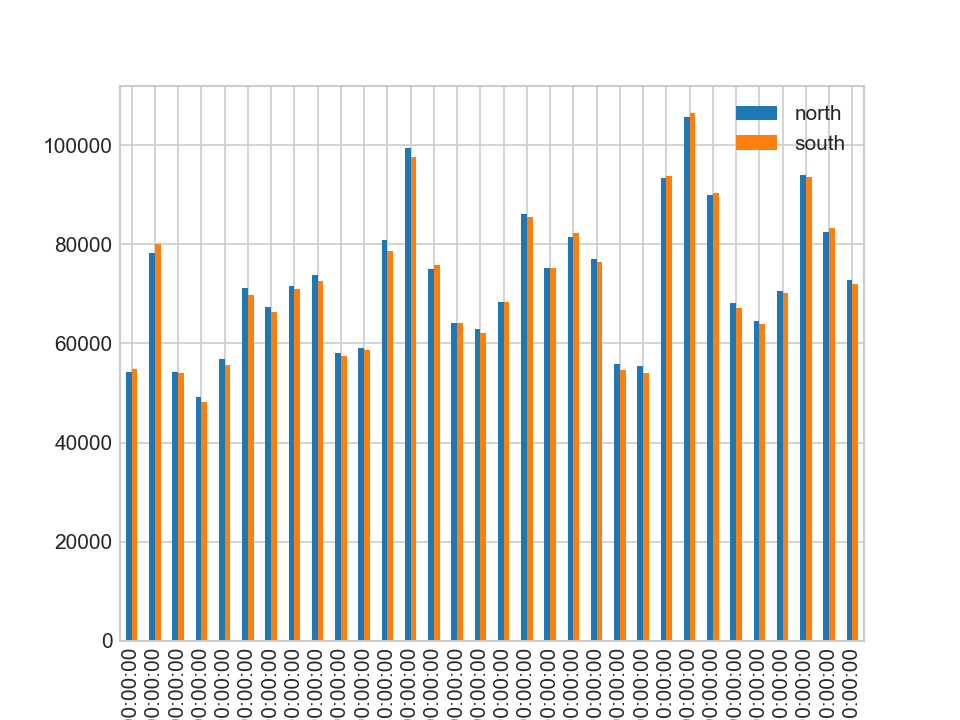

In [74]:
df.resample('M').sum().plot(kind = "bar")

In [ ]:
# %load _solutions/case1_bike_count42.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Let's have a look at some short term patterns. For the data of the first 3 weeks of January 2014, calculate the hourly counts and visualize them.</li>
</ul> 

</div>

<IPython.core.display.Javascript object>


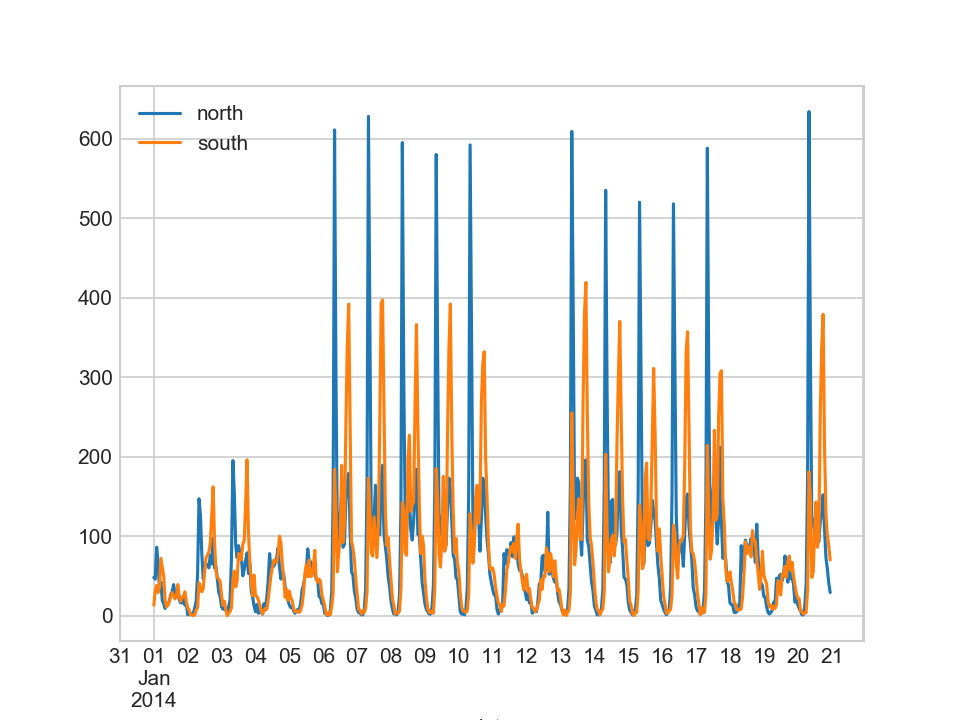

In [92]:
df['2014-01-01':'2014-01-20'].resample('H').sum().plot()

In [ ]:
# %load _solutions/case1_bike_count43.py

In [ ]:
# %load _solutions/case1_bike_count44.py

In [ ]:
# %load _solutions/case1_bike_count45.py

**New Year's Eve 2013-2014**

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Select a subset of the data set from 2013-12-31 12:00:00 untill 2014-01-01 12:00:00, store as variable `newyear` and plot this subset</li>
  <li>Use a `rolling` function (check documentation of the function!) to smooth the data of this period and make a plot of the smoothed version</li>
</ul> 

</div>

<IPython.core.display.Javascript object>


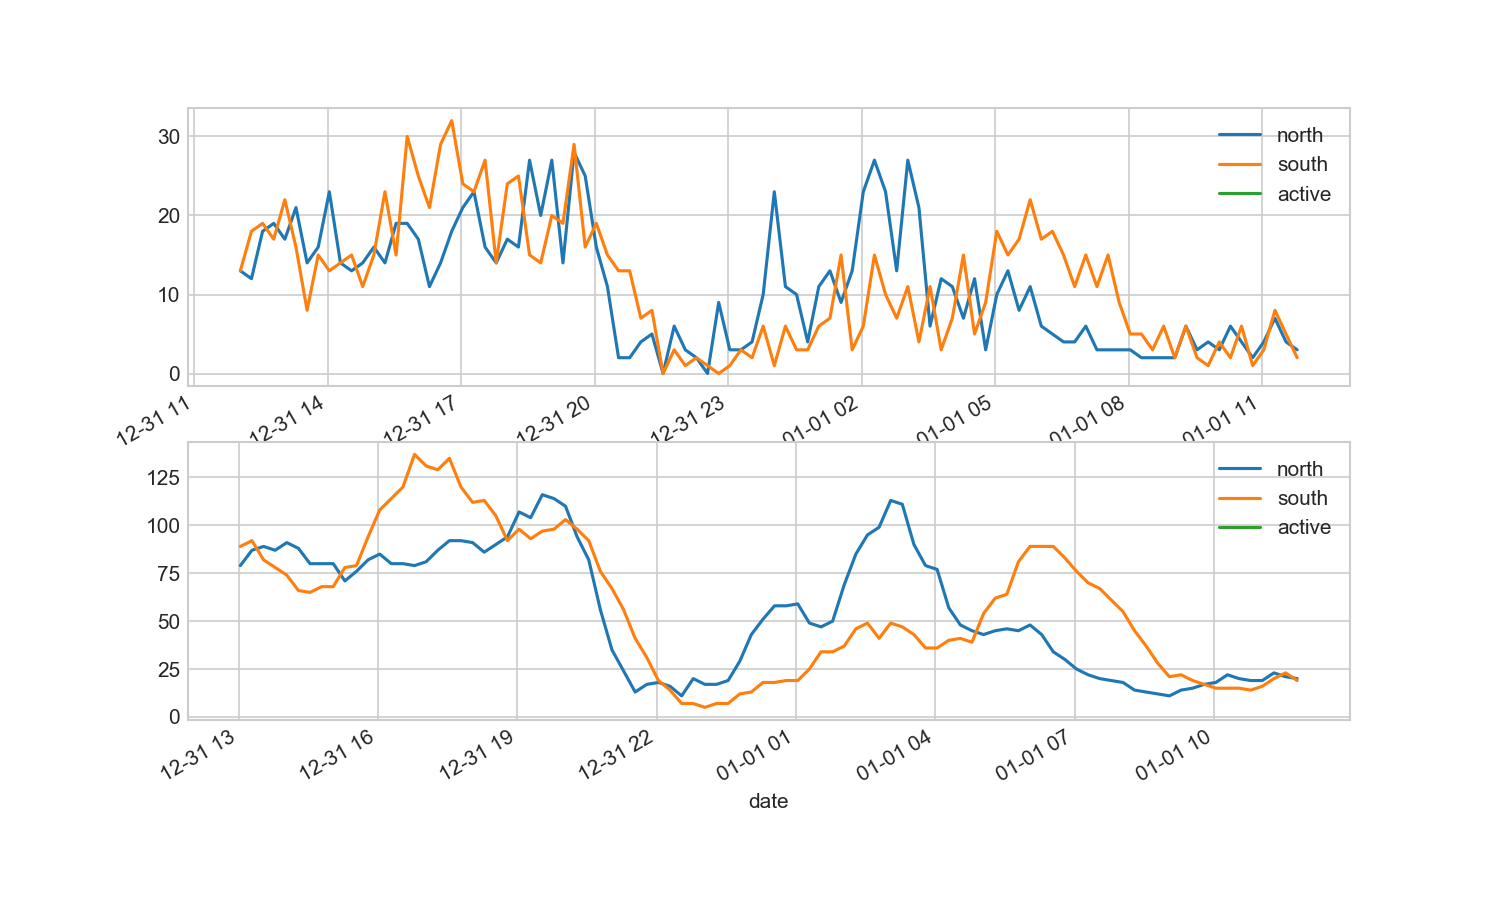

In [122]:
newyear = df['2013-12-31 12:00:00': '2014-01-01 12:00:00']
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
newyear.plot(ax = ax1)
newyear.rolling(window = 5).sum().plot(ax = ax2)

In [93]:
# %load _solutions/case1_bike_count46.py

In [94]:
# %load _solutions/case1_bike_count47.py

In [95]:
# %load _solutions/case1_bike_count48.py

---

## The power of `groupby`...

Looking at the data in the above exercises, there seems to be clearly a:

- daily pattern
- weekly pattern
- yearly pattern

Such patterns can easily be calculated and visualized in pandas using the DatetimeIndex attributes `weekday` combined with `groupby` functionality. Below a taste of the possibilities, and we will learn about this in the proceeding notebooks:

**Weekly pattern**:

In [124]:
df_daily = df.resample('D').sum()
df_daily.head()

,north,south
date,,
2012-10-12,31,57
2012-10-13,932,950
2012-10-14,1155,1386
2012-10-15,3649,3546
2012-10-16,3630,3537


<IPython.core.display.Javascript object>


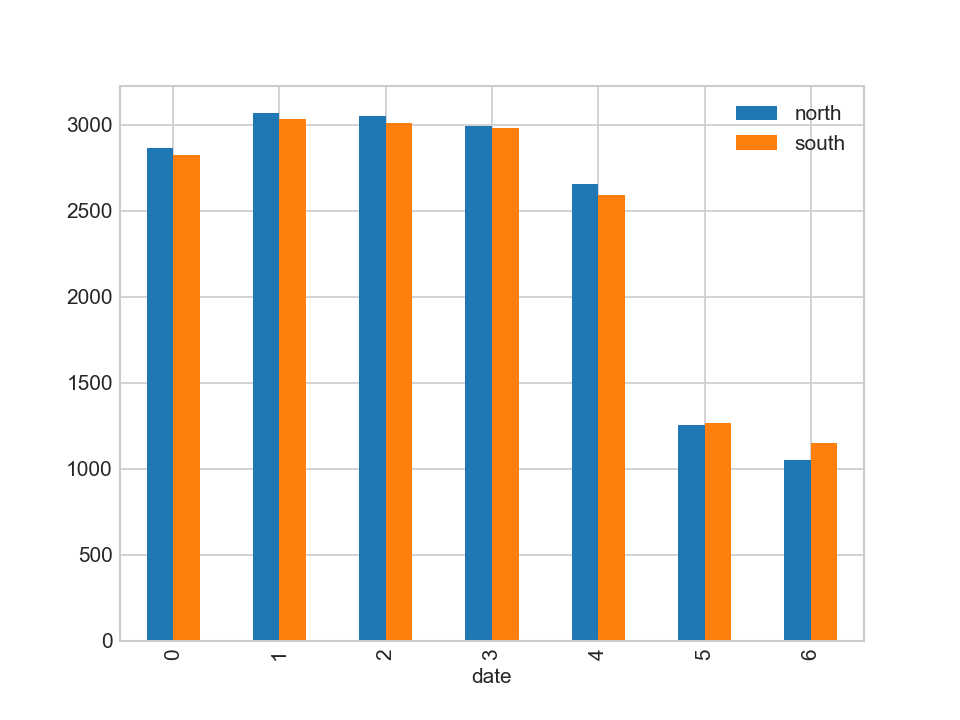

In [97]:
df_daily.groupby(df_daily.index.weekday).mean().plot(kind='bar')

**Daily pattern:**

<IPython.core.display.Javascript object>


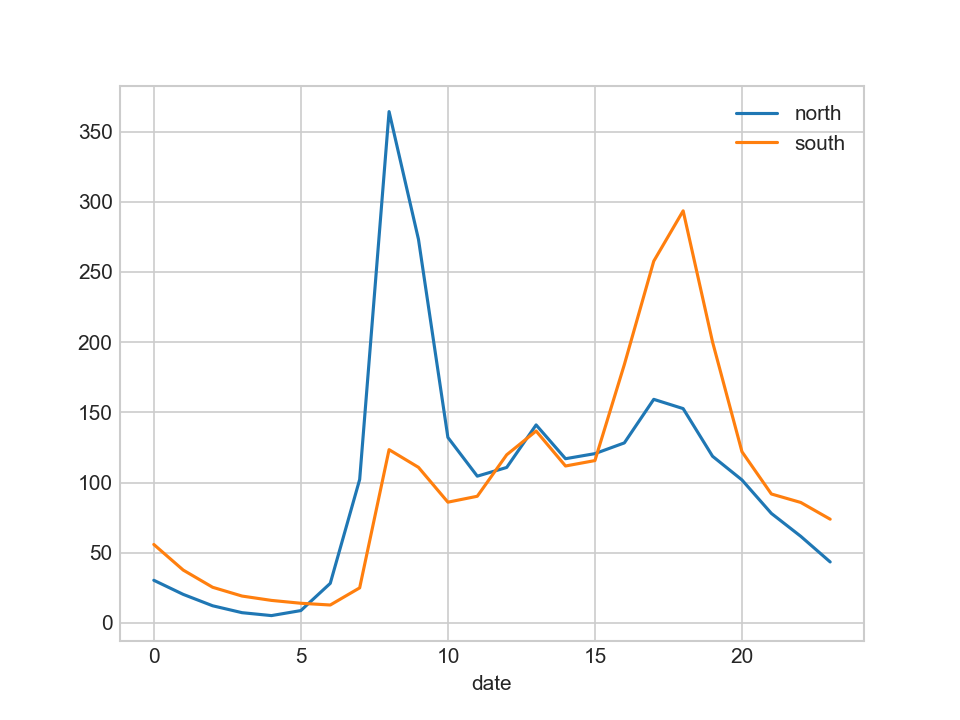

In [127]:
df_hourly = df.resample('H').sum()
df_hourly.head()
df_hourly.groupby(df_hourly.index.hour).mean().plot()

So the daily pattern is clearly different for both directions. In the morning more people go north, in the evening more people go south. The morning peak is also more condensed.

**Monthly pattern**

In [128]:
df_monthly = df.resample('M').sum()

In [129]:
from calendar import month_abbr 

<IPython.core.display.Javascript object>


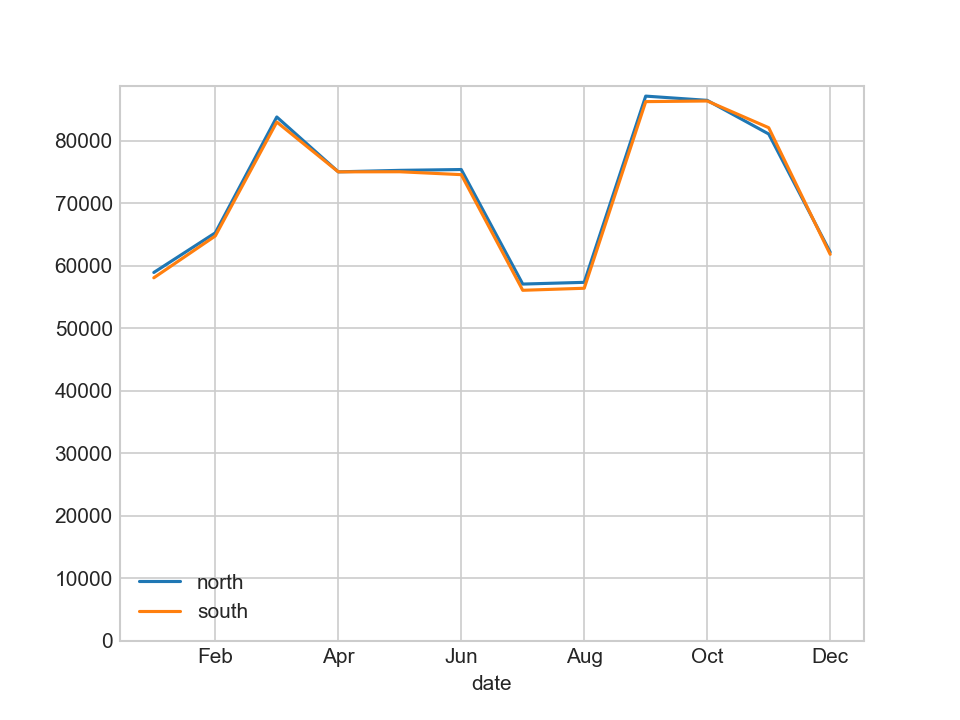

In [130]:
ax = df_monthly.groupby(df_monthly.index.month).mean().plot()
ax.set_ylim(0)
xlabels = ax.set_xticklabels(list(month_abbr)[0::2]) #too lazy to writ the month values yourself...

## Acknowledgements
Thanks to the [city of Ghent](https://data.stad.gent/) for opening their data